# 2.0 - Feature Engineering - Team 34
German Credit Risk Dataset - Feature Preparation for Modeling

This notebook demonstrates the feature engineering pipeline.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import our custom modules
from fase2.config import (
    INTERIM_DATA_DIR, PROCESSED_DATA_DIR, MODELS_DIR,
    TARGET_COL, TEST_SIZE, RANDOM_STATE
)
from fase2.features import (
    detect_outliers_iqr,
    split_features_target,
    train_test_split_data,
    scale_features
)

print("✓ Imports successful")

2025-10-26 22:38:58.252 | INFO     | fase2.config:<module>:11 - PROJ_ROOT path is: /Users/alejandrodiazvillagomez/Desktop/Proyecto/Fase2


✓ Imports successful


## Load Cleaned Data

In [2]:
df = pd.read_csv(INTERIM_DATA_DIR / "german_credit_cleaned.csv")
print(f"Initial dataset shape: {df.shape}")
df.head()

Initial dataset shape: (846, 21)


,checking_account,duration,credit_history,purpose,amount,savings_account,employment_duration,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
0,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,...,2.0,21.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,...,1.0,36.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0
2,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,1.0,...,1.0,23.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0
3,1.0,12.0,4.0,0.0,2122.0,1.0,3.0,3.0,3.0,1.0,...,1.0,39.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
4,1.0,12.0,4.0,0.0,2171.0,1.0,3.0,4.0,3.0,1.0,...,2.0,38.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0


## Outlier Detection and Removal

In [3]:
# Define continuous features for outlier detection
from fase2.config import CONTINUOUS_FEATURES

print(f"Checking outliers in: {CONTINUOUS_FEATURES}")

# Detect outliers
df_clean, outlier_mask = detect_outliers_iqr(
    df, 
    [col for col in CONTINUOUS_FEATURES if col in df.columns]
)

print(f"\nDataset after outlier removal: {df_clean.shape}")
print(f"Outliers removed: {outlier_mask.sum()} ({100*outlier_mask.sum()/len(df):.2f}%)")

Checking outliers in: ['duration', 'amount', 'installment_rate', 'age', 'residence_duration', 'existing_credits']
2025-10-26 22:38:58.443 | INFO     | fase2.features:detect_outliers_iqr:37 - Detecting outliers in 6 columns using IQR method...


Detecting outliers: 100%|██████████| 6/6 [00:00<00:00, 1694.44it/s]

2025-10-26 22:38:58.457 | INFO     | fase2.features:detect_outliers_iqr:68 - ✓ Found 157 rows with outliers
2025-10-26 22:38:58.457 | INFO     | fase2.features:detect_outliers_iqr:71 -   - duration: 63 outliers
2025-10-26 22:38:58.457 | INFO     | fase2.features:detect_outliers_iqr:71 -   - amount: 60 outliers
2025-10-26 22:38:58.457 | INFO     | fase2.features:detect_outliers_iqr:71 -   - installment_rate: 3 outliers
2025-10-26 22:38:58.457 | INFO     | fase2.features:detect_outliers_iqr:71 -   - age: 30 outliers
2025-10-26 22:38:58.457 | INFO     | fase2.features:detect_outliers_iqr:71 -   - residence_duration: 8 outliers
2025-10-26 22:38:58.457 | INFO     | fase2.features:detect_outliers_iqr:71 -   - existing_credits: 17 outliers
2025-10-26 22:38:58.457 | SUCCESS  | fase2.features:detect_outliers_iqr:73 - ✓ Removed 157 outlier rows (18.56%)
2025-10-26 22:38:58.457 | SUCCESS  | fase2.features:detect_outliers_iqr:76 - ✓ Final clean shape: (689, 21)

Dataset after outlier removal: (689

## Train-Test Split

In [4]:
# Separate features and target
X, y = split_features_target(df_clean)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# %%
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split_data(X, y)

print("\n=== TRAIN-TEST SPLIT ===")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Test size: {TEST_SIZE * 100}%")

2025-10-26 22:38:58.462 | INFO     | fase2.features:split_features_target:97 - Separating features and target variable 'credit_risk'...
2025-10-26 22:38:58.463 | SUCCESS  | fase2.features:split_features_target:102 - ✓ Features shape: (689, 20), Target shape: (689,)
Features shape: (689, 20)
Target shape: (689,)
2025-10-26 22:38:58.463 | INFO     | fase2.features:train_test_split_data:109 - Splitting data (test_size=0.2, random_state=42)...
2025-10-26 22:38:58.465 | SUCCESS  | fase2.features:train_test_split_data:117 - ✓ Train: 551 samples, Test: 138 samples
2025-10-26 22:38:58.466 | INFO     | fase2.features:train_test_split_data:118 -   - Train class distribution: {1.0: 405, 0.0: 146}
2025-10-26 22:38:58.466 | INFO     | fase2.features:train_test_split_data:119 -   - Test class distribution: {1.0: 101, 0.0: 37}

=== TRAIN-TEST SPLIT ===
Training samples: 551
Test samples: 138
Test size: 20.0%


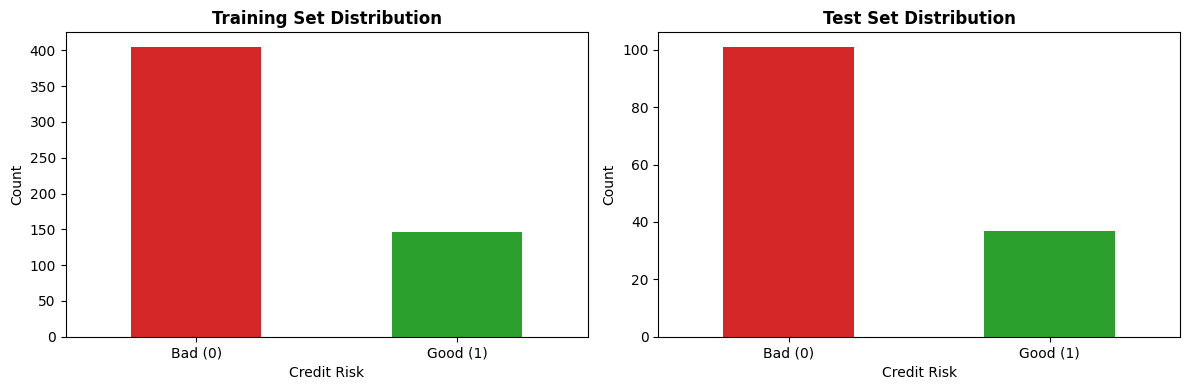

In [5]:
# Visualize class distribution in splits
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

y_train.value_counts().plot(kind='bar', ax=axes[0], color=['#d62728', '#2ca02c'])
axes[0].set_title('Training Set Distribution', fontweight='bold')
axes[0].set_xlabel('Credit Risk')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Bad (0)', 'Good (1)'], rotation=0)

y_test.value_counts().plot(kind='bar', ax=axes[1], color=['#d62728', '#2ca02c'])
axes[1].set_title('Test Set Distribution', fontweight='bold')
axes[1].set_xlabel('Credit Risk')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Bad (0)', 'Good (1)'], rotation=0)

plt.tight_layout()
plt.show()

## Feature Scaling

2025-10-26 22:38:58.575 | INFO     | fase2.features:scale_features:129 - Scaling features using StandardScaler...
2025-10-26 22:38:58.578 | SUCCESS  | fase2.features:scale_features:141 - ✓ Features scaled successfully
✓ Features scaled using StandardScaler
Scaler mean: [   2.60072595   18.03629764    2.53720508    2.82577132 2520.13430127]...
Scaler std: [1.26244060e+00 8.62121576e+00 1.06331954e+00 2.63278025e+00
 1.58785328e+03]...


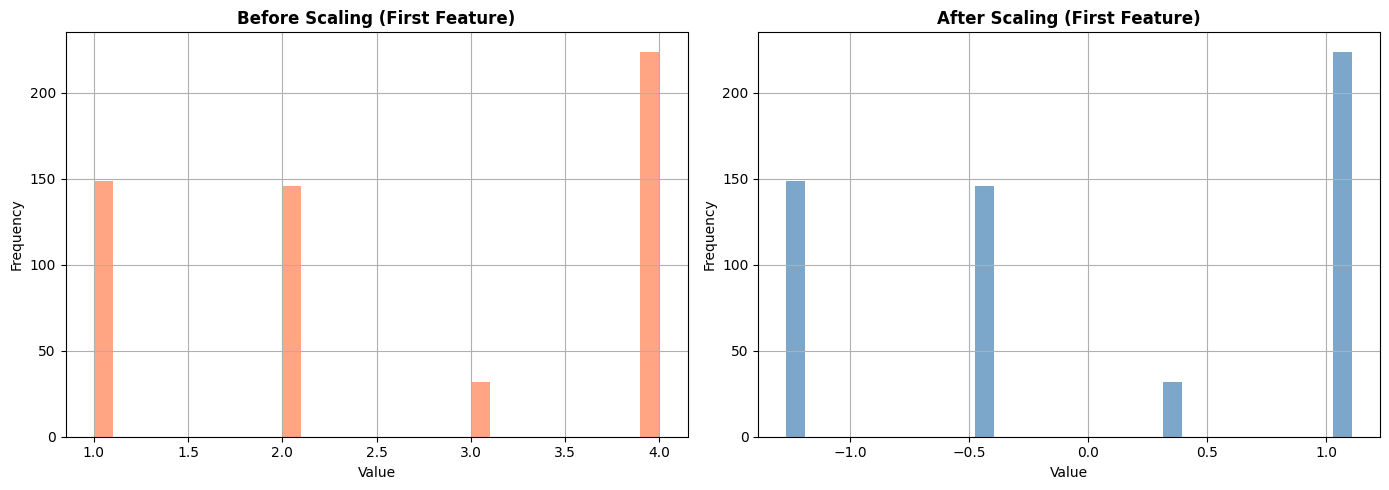

In [6]:
# Scale features
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

print("✓ Features scaled using StandardScaler")
print(f"Scaler mean: {scaler.mean_[:5]}...")
print(f"Scaler std: {scaler.scale_[:5]}...")

# %%
# Compare before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
X_train.iloc[:, 0].hist(bins=30, ax=axes[0], color='coral', alpha=0.7)
axes[0].set_title('Before Scaling (First Feature)', fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# After scaling
X_train_scaled.iloc[:, 0].hist(bins=30, ax=axes[1], color='steelblue', alpha=0.7)
axes[1].set_title('After Scaling (First Feature)', fontweight='bold')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
print("✓ Feature engineering complete!")
print("\n=== SUMMARY ===")
print(f"Final training samples: {len(X_train_scaled)}")
print(f"Final test samples: {len(X_test_scaled)}")
print(f"Number of features: {X_train_scaled.shape[1]}")
print(f"\nReady for modeling! 🚀")

✓ Feature engineering complete!

=== SUMMARY ===
Final training samples: 551
Final test samples: 138
Number of features: 20

Ready for modeling! 🚀
